### This notebook is optionally accelerated with a GPU runtime.
### If you would like to use this acceleration, please select the menu option "Runtime" -> "Change runtime type", select "Hardware Accelerator" -> "GPU" and click "SAVE"

----------------------------------------------------------------------

# AlexNet

*Author: Pytorch Team*

**The 2012 ImageNet winner achieved a top-5 error of 15.3%, more than 10.8 percentage points lower than that of the runner up.**

_ | _
- | -
![alt](https://pytorch.org/assets/images/alexnet1.png) | ![alt](https://pytorch.org/assets/images/alexnet2.png)

In [33]:
#!/usr/bin/env python
## -*- coding: utf-8 -*-
__author__ = ["Raúl Elizalde Meneses"]
__license__ = "MIT"
__version__ = "0.0.1"
__email__ = "raul.elizalde.m@gmail.com"
__status__ = "Development"



In [34]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

All pre-trained models expect input images normalized in the same way,
i.e. mini-batches of 3-channel RGB images of shape `(3 x H x W)`, where `H` and `W` are expected to be at least `224`.
The images have to be loaded in to a range of `[0, 1]` and then normalized using `mean = [0.485, 0.456, 0.406]`
and `std = [0.229, 0.224, 0.225]`.

Here's a sample execution.

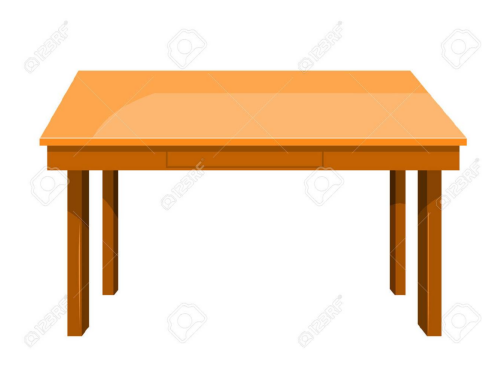

In [35]:
from sys import set_coroutine_origin_tracking_depth
!pip install pillow requests

import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

Rhino="https://upload.wikimedia.org/wikipedia/commons/a/a0/Rhinoceros_rsa.JPG"
Snake="https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Crotalus_cerastes_mesquite_springs_CA-2.jpg/1280px-Crotalus_cerastes_mesquite_springs_CA-2.jpg"
Butterfly="https://iucn.org/sites/default/files/styles/article_image/public/2022-07/3_monarch-butterfly_-joe-schelling_compressed-for-web.jpg?h=1c9b88c9&itok=CPi0pYFg"
Dog="https://github.com/pytorch/hub/raw/master/images/dog.jpg"
Armadillo="https://www.floridamuseum.ufl.edu/wp-content/uploads/sites/23/2020/05/armadillo-web-sized.jpg"
Mole="https://i.redd.it/snxrp16j4uh01.png"
Shark="https://upload.wikimedia.org/wikipedia/commons/b/bb/Tibur%C3%B3n.jpg"
Whale="https://upload.wikimedia.org/wikipedia/commons/e/e5/JumpingOrca.jpg"

Mesa="https://previews.123rf.com/images/madozi/madozi1310/madozi131000008/22681192-mesa-de-madera-ilustraci%C3%B3n-sobre-fondo-blanco.jpg"


# URL de la imagen
url = Mesa

# Solicitar la imagen desde el enlace
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Mostrar la imagen usando matplotlib
plt.imshow(img)
plt.axis('off')  # Ocultar los ejes
plt.show()
# URL de la imagen




<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2896x1944 at 0x7C37493CDA80>


In [36]:
# Download an example image from the pytorch website
import urllib
url, filename = (url, "imagen.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [37]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
from io import BytesIO
input_image = Image.open(filename)



In [38]:

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model


In [39]:

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([-3.9691e+00, -1.8527e+00, -4.4586e+00, -7.3313e+00, -2.4930e+00,
        -4.3345e+00, -7.5376e+00, -1.7552e+00,  1.2295e+00, -3.4618e+00,
        -4.3799e+00, -3.7810e+00, -2.1317e+00, -2.9048e+00, -3.5157e+00,
        -6.6096e-01,  2.2855e+00,  8.1544e-01,  5.7553e-01, -1.5740e+00,
        -5.9984e+00, -3.3442e+00, -1.1836e+00, -1.6289e+00, -4.4536e+00,
        -3.0856e+00, -1.1897e+00, -1.1583e+00, -3.2049e+00, -6.4615e-01,
        -5.1415e+00, -3.7371e+00, -4.9686e+00, -5.6151e+00, -4.5061e+00,
        -6.5773e+00, -4.3948e+00, -1.8294e+00, -2.7606e+00, -2.3084e+00,
        -2.6360e+00, -4.7722e+00, -4.9805e+00, -2.8128e+00, -2.0144e+00,
        -3.2566e+00, -1.6413e+00, -3.7705e+00, -4.5122e+00, -6.4649e+00,
        -5.8807e+00, -1.5028e+00, -4.2866e-01, -6.1127e+00, -5.7012e+00,
        -5.9585e+00, -5.4144e+00, -7.5499e+00, -9.8781e+00, -4.4271e+00,
        -5.2450e+00, -2.5474e+00, -5.1041e+00, -5.1246e+00, -3.0950e+00,
        -3.3909e+00, -4.2448e+00, -4.4212e+00, -5.1

In [40]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2024-12-06 13:45:26--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.2’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2024-12-06 13:45:27 (90.6 MB/s) - ‘imagenet_classes.txt.2’ saved [10472/10472]



In [41]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

desk 0.6245276927947998
studio couch 0.16449302434921265
dining table 0.10234235972166061
crib 0.04333188012242317
pedestal 0.02059219218790531


### Model Description

AlexNet competed in the ImageNet Large Scale Visual Recognition Challenge on September 30, 2012. The network achieved a top-5 error of 15.3%, more than 10.8 percentage points lower than that of the runner up. The original paper's primary result was that the depth of the model was essential for its high performance, which was computationally expensive, but made feasible due to the utilization of graphics processing units (GPUs) during training.

The 1-crop error rates on the ImageNet dataset with the pretrained model are listed below.

| Model structure | Top-1 error | Top-5 error |
| --------------- | ----------- | ----------- |
|  AlexNet        | 43.45       | 20.91       |

### References

1. [One weird trick for parallelizing convolutional neural networks](https://arxiv.org/abs/1404.5997).